In [1]:
import pandas as pd
dataFrame = pd.read_csv("/content/zoo3.csv")
print("Quantidade de linhas do dataframe:",len(dataFrame))
print("Quantidade de colunas do dataframe:",len(dataFrame.columns))

Quantidade de linhas do dataframe: 70
Quantidade de colunas do dataframe: 18


In [2]:
dataFrame.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
dataFrame.dtypes

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object

In [4]:
dataFrameCluster = dataFrame.drop(columns='animal_name')
dataFrameCluster.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [5]:
from sklearn.cluster import KMeans

In [7]:
objCluster = KMeans(n_clusters=7)

In [8]:
objCluster.fit(dataFrameCluster)

KMeans(n_clusters=7)

In [9]:
arrayCluster = objCluster.predict(dataFrameCluster)
arrayCluster

array([2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 5, 5, 0, 0,
       0, 5, 0, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1,
       1, 4, 1, 1], dtype=int32)

In [10]:
dataFrameResult = dataFrame[["animal_name"]].copy()
dataFrameResult["classe"] = arrayCluster
pd.set_option("display.max_rows", 70)
dataFrameResult

,animal_name,classe
0,anta,2
1,ariranha,2
2,boto-cor-de-rosa,0
3,bugio,2
4,cachorro-vinagre,2
5,chimpanze,2
6,gato-maracaja,2
7,jaguatirica,2
8,lobo-guara,2
9,macaco-aranha,2


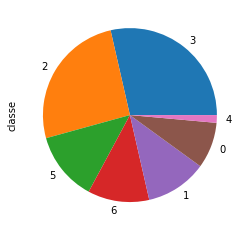

In [11]:
dataFrameResult["classe"].value_counts().plot(kind="pie")

Text(0, 0.5, 'Variância')

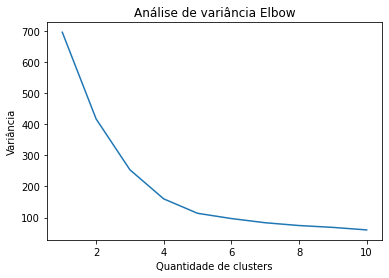

In [13]:
import matplotlib.pyplot as plt
variancia = []
for i in range(1,11):
  objCluster = KMeans(n_clusters=i)
  objCluster.fit(dataFrameCluster)
  variancia.append(objCluster.inertia_)

plt.plot(range(1,11),variancia)
plt.title("Análise de variância Elbow")
plt.xlabel("Quantidade de clusters")
plt.ylabel("Variância")